#### Q4. Convolution Neural Networks
1. Design & describe an architecture for CNNs
2. Try different architecture (# of layers, convolution filter sizes, skipping connections)
3. Try different batch normalization techniques
4. drop-out, regulization -> improved generalization?
5. Try different loss functions
6. Try to compress nn (e.g. truncated SVD)
7. Change other major hyperparameter (e.g. learning rates, batch sizes)
8. Train CNN from scratch vs pre-trained and fine-tuning?
9. Compare with Q2 and Q3


In [1]:
import sys
import os
sys.path.append('../')

from CNN import cnn

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch
import time

In [3]:
# Define Dataset Paths and Transformations
current_dir = os.getcwd()
root_dir = os.path.join(current_dir, "../RF_code/Caltech_101")
transform = transforms.Compose([
    transforms.Resize((128,128)),  # Resize images
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Create Training and Testing Datasets
train_dataset = cnn.Caltech101Dataset(root_dir, transform=transform, train=True)
test_dataset = cnn.Caltech101Dataset(root_dir, transform=transform, train=False)

train_loader_2 = cnn.DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader_2 = cnn.DataLoader(test_dataset, batch_size=2, shuffle=False)

train_loader_4 = cnn.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader_4 = cnn.DataLoader(test_dataset, batch_size=4, shuffle=False)

train_loader_8 = cnn.DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader_8 = cnn.DataLoader(test_dataset, batch_size=8, shuffle=False)

train_loader_16 = cnn.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader_16 = cnn.DataLoader(test_dataset, batch_size=16, shuffle=False)

train_loader_32 = cnn.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_32 = cnn.DataLoader(test_dataset, batch_size=32, shuffle=False)

train_loader_64 = cnn.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_64 = cnn.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# 4-1 -> in the report

In [ ]:
# 4-2 number of layers
layers = [3, 4, 5]
train_accuracy_layers = []
test_accuracy_layers = []
for i in layers:
    model = cnn.CustomCNN(total_layers=i)

    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_4, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_4)
    train_accuracy_layers.append(train_losses)
    test_accuracy_layers.append(test_accuracy)

print(train_accuracy_layers)
print(test_accuracy_layers)

# fig, ax1 = plt.subplots()
# ax1.plot(layers, train_accuracy_layers, color='red', linestyle='-')

# ax2 = ax1.twinx()
# ax2.plot(layers, test_accuracy_layers, color='blue', marker='o', linestyle='-')
# plt.show()

# plt.figure()
# plt.bar(layers, test_accuracy_layers)
# plt.xlabel("number of layers")
# plt.ylabel("test accuracy")
# plt.title("Accuracy according to nunmber of layers")
# plt.show()

Epoch 1/100, Loss: 2.3301
Epoch 2/100, Loss: 2.1689
Epoch 3/100, Loss: 1.9963
Epoch 4/100, Loss: 1.7163
Epoch 5/100, Loss: 1.4975
Epoch 6/100, Loss: 1.3175
Epoch 7/100, Loss: 1.0391
Epoch 8/100, Loss: 0.8316
Epoch 9/100, Loss: 0.7918
Epoch 10/100, Loss: 0.5643
Epoch 11/100, Loss: 0.4498
Epoch 12/100, Loss: 0.3918
Epoch 13/100, Loss: 0.3403
Epoch 14/100, Loss: 0.2807
Epoch 15/100, Loss: 0.2426
Epoch 16/100, Loss: 0.1741
Epoch 17/100, Loss: 0.1649
Epoch 18/100, Loss: 0.1742
Epoch 19/100, Loss: 0.1251
Epoch 20/100, Loss: 0.1133
Epoch 21/100, Loss: 0.1029
Epoch 22/100, Loss: 0.0924
Epoch 23/100, Loss: 0.1016
Epoch 24/100, Loss: 0.0650
Epoch 25/100, Loss: 0.0765
Epoch 26/100, Loss: 0.1119
Epoch 27/100, Loss: 0.0856
Epoch 28/100, Loss: 0.0591
Epoch 29/100, Loss: 0.0860
Epoch 30/100, Loss: 0.0575
Epoch 31/100, Loss: 0.0357
Epoch 32/100, Loss: 0.0333
Epoch 33/100, Loss: 0.0197
Epoch 34/100, Loss: 0.0290
Epoch 35/100, Loss: 0.0272
Epoch 36/100, Loss: 0.0200
Epoch 37/100, Loss: 0.0179
Epoch 38/1

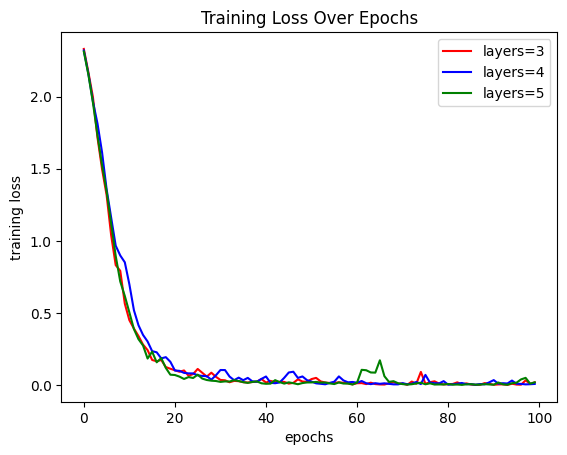

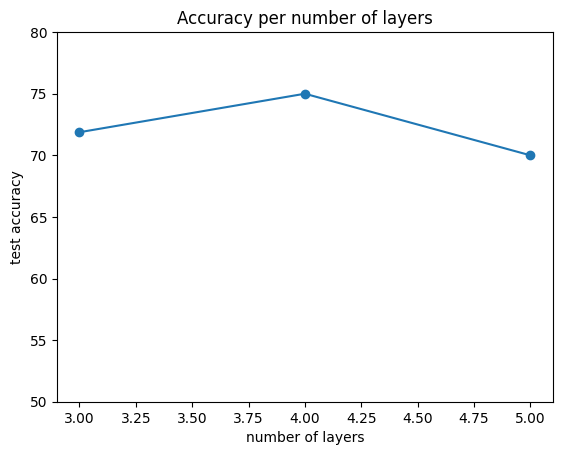

In [22]:
plt.plot(train_accuracy_layers[0], color='red',label='layers=3')
plt.plot(train_accuracy_layers[1], color='blue',label='layers=4')
plt.plot(train_accuracy_layers[2], color='green', label='layers=5')
plt.xlabel('epochs')      
plt.ylabel('training loss')    
plt.title('Training Loss Over Epochs')          
plt.legend()                 
plt.show()

plt.plot(layers, test_accuracy_layers, marker='o', linestyle='-')
plt.xlabel('number of layers')      
plt.ylabel('test accuracy')      
plt.ylim([50, 80])
plt.title('Accuracy per number of layers')                     
plt.show()

In [4]:
# size of kernel
kernel_size = [3, 5, 7]
test_accuracy_kernel = []
for i in kernel_size:
    model = cnn.CustomCNN(conv_kernel_size = i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_4, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_4)
    test_accuracy_kernel.append(test_accuracy)


Epoch 1/100, Loss: 2.3235
Epoch 2/100, Loss: 2.1677
Epoch 3/100, Loss: 1.9181
Epoch 4/100, Loss: 1.7003
Epoch 5/100, Loss: 1.5035
Epoch 6/100, Loss: 1.3426
Epoch 7/100, Loss: 1.1311
Epoch 8/100, Loss: 0.9182
Epoch 9/100, Loss: 0.7629
Epoch 10/100, Loss: 0.7255
Epoch 11/100, Loss: 0.6130
Epoch 12/100, Loss: 0.4004
Epoch 13/100, Loss: 0.3926
Epoch 14/100, Loss: 0.2660
Epoch 15/100, Loss: 0.3232
Epoch 16/100, Loss: 0.2947
Epoch 17/100, Loss: 0.2359
Epoch 18/100, Loss: 0.1858
Epoch 19/100, Loss: 0.1313
Epoch 20/100, Loss: 0.1246
Epoch 21/100, Loss: 0.1063
Epoch 22/100, Loss: 0.1049
Epoch 23/100, Loss: 0.1169
Epoch 24/100, Loss: 0.0885
Epoch 25/100, Loss: 0.0532
Epoch 26/100, Loss: 0.0907
Epoch 27/100, Loss: 0.0648
Epoch 28/100, Loss: 0.0587
Epoch 29/100, Loss: 0.0305
Epoch 30/100, Loss: 0.0423
Epoch 31/100, Loss: 0.0449
Epoch 32/100, Loss: 0.0330
Epoch 33/100, Loss: 0.0269
Epoch 34/100, Loss: 0.0256
Epoch 35/100, Loss: 0.0304
Epoch 36/100, Loss: 0.0214
Epoch 37/100, Loss: 0.0151
Epoch 38/1

[79.375, 72.5, 64.375]


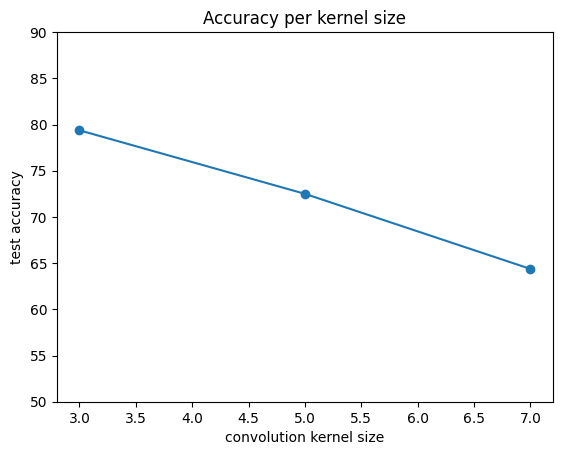

In [7]:
print(test_accuracy_kernel)
plt.plot(kernel_size, test_accuracy_kernel, marker='o', linestyle='-')
plt.xlabel("convolution kernel size")
plt.ylabel("test accuracy")
plt.ylim([50, 90])
plt.title("Accuracy per kernel size")
plt.show()

In [ ]:
# residual connection
connection = [0, 1, 2]
# 0 connection X
# 1 connection btw all layers
# 2 하나씩 건너뛰면서
test_accuracy_connection = []
for i in connection:
    model = cnn.CustomCNN(skip_connection = i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_4, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_4)
    test_accuracy_connection.append(test_accuracy)

Epoch 1/100, Loss: 2.3344
Epoch 2/100, Loss: 2.2354
Epoch 3/100, Loss: 2.0847
Epoch 4/100, Loss: 1.8713
Epoch 5/100, Loss: 1.7271
Epoch 6/100, Loss: 1.2914
Epoch 7/100, Loss: 1.2389
Epoch 8/100, Loss: 1.0652
Epoch 9/100, Loss: 0.8142
Epoch 10/100, Loss: 0.7406
Epoch 11/100, Loss: 0.5510
Epoch 12/100, Loss: 0.4795
Epoch 13/100, Loss: 0.4071
Epoch 14/100, Loss: 0.3923
Epoch 15/100, Loss: 0.2789
Epoch 16/100, Loss: 0.2514
Epoch 17/100, Loss: 0.1996
Epoch 18/100, Loss: 0.2290
Epoch 19/100, Loss: 0.1263
Epoch 20/100, Loss: 0.1398
Epoch 21/100, Loss: 0.1194
Epoch 22/100, Loss: 0.0957
Epoch 23/100, Loss: 0.1302
Epoch 24/100, Loss: 0.1115
Epoch 25/100, Loss: 0.0777
Epoch 26/100, Loss: 0.0619
Epoch 27/100, Loss: 0.0892
Epoch 28/100, Loss: 0.0544
Epoch 29/100, Loss: 0.0338
Epoch 30/100, Loss: 0.0279
Epoch 31/100, Loss: 0.0318
Epoch 32/100, Loss: 0.0312
Epoch 33/100, Loss: 0.0456
Epoch 34/100, Loss: 0.0891
Epoch 35/100, Loss: 0.0529
Epoch 36/100, Loss: 0.0175
Epoch 37/100, Loss: 0.0221
Epoch 38/1

[71.875, 77.5, 73.75]


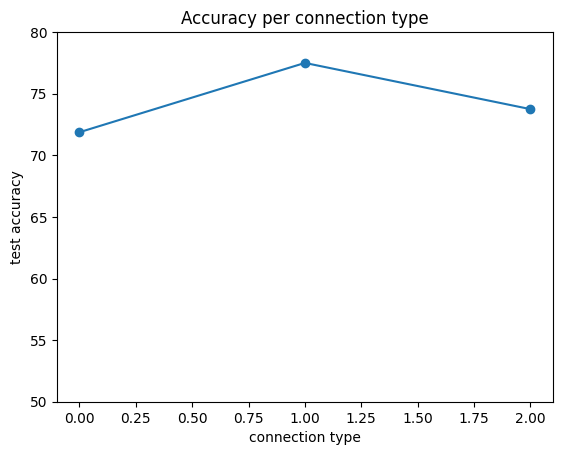

In [9]:
print(test_accuracy_connection)    
plt.plot(connection, test_accuracy_connection, marker='o', linestyle='-')
plt.xlabel("connection type")
plt.ylabel("test accuracy")
plt.ylim([50, 80])
plt.title("Accuracy per connection type")
plt.show()

Epoch 1/100, Loss: 2.3664
Epoch 2/100, Loss: 2.0654
Epoch 3/100, Loss: 1.8588
Epoch 4/100, Loss: 1.5875
Epoch 5/100, Loss: 1.3640
Epoch 6/100, Loss: 1.1572
Epoch 7/100, Loss: 0.9593
Epoch 8/100, Loss: 0.8413
Epoch 9/100, Loss: 0.6631
Epoch 10/100, Loss: 0.4779
Epoch 11/100, Loss: 0.4625
Epoch 12/100, Loss: 0.3644
Epoch 13/100, Loss: 0.2713
Epoch 14/100, Loss: 0.1759
Epoch 15/100, Loss: 0.2318
Epoch 16/100, Loss: 0.1198
Epoch 17/100, Loss: 0.1566
Epoch 18/100, Loss: 0.1369
Epoch 19/100, Loss: 0.0831
Epoch 20/100, Loss: 0.0880
Epoch 21/100, Loss: 0.0781
Epoch 22/100, Loss: 0.0800
Epoch 23/100, Loss: 0.0451
Epoch 24/100, Loss: 0.0619
Epoch 25/100, Loss: 0.0416
Epoch 26/100, Loss: 0.0386
Epoch 27/100, Loss: 0.0715
Epoch 28/100, Loss: 0.0206
Epoch 29/100, Loss: 0.0219
Epoch 30/100, Loss: 0.0274
Epoch 31/100, Loss: 0.0204
Epoch 32/100, Loss: 0.0104
Epoch 33/100, Loss: 0.0212
Epoch 34/100, Loss: 0.0101
Epoch 35/100, Loss: 0.0076
Epoch 36/100, Loss: 0.0136
Epoch 37/100, Loss: 0.0066
Epoch 38/1

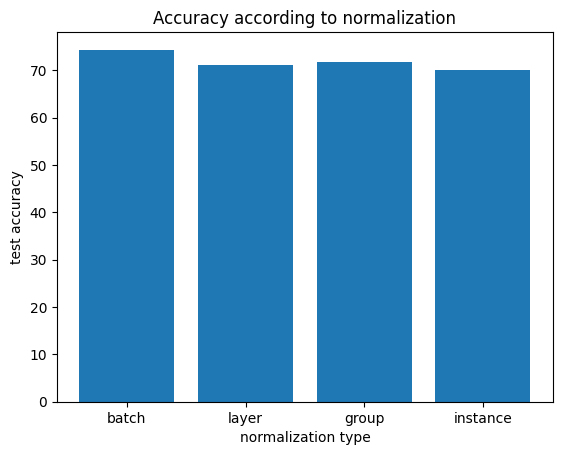

In [ ]:
# 4-3 normalization type

normalization_type =  ["batch", "layer", "group", "instance"]
test_accuracy_normalization = []

for i in normalization_type:
    model = cnn.CustomCNN(normalization=i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_4, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_4)
    test_accuracy_normalization.append(test_accuracy)

print(test_accuracy_normalization)
plt.figure()
plt.bar(normalization_type, test_accuracy_normalization)
plt.xlabel("normalization type")
plt.ylabel("test accuracy")
plt.title("Accuracy according to normalization")
plt.show()

In [46]:
# 4-3 normalization type

normalization_type =  ["batch", "layer", "instance", "group"]
# batch sizes
train_loaders = [train_loader_2, train_loader_4, train_loader_8, train_loader_16, train_loader_32]
test_loaders = [test_loader_2, test_loader_4, test_loader_8, test_loader_16, test_loader_32]
test_accuracy_normalization = []

for i in normalization_type:
    accuracy = []
    model = cnn.CustomCNN(normalization=i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    for i in range(5):
        train_losses = cnn.train_model(model, train_loaders[i], optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
        test_accuracy = cnn.evaluate_model(model, test_loaders[i])
        accuracy.append(test_accuracy)

    test_accuracy_normalization.append(accuracy)

# print(test_accuracy_normalization)
# plt.figure()
# plt.bar(normalization_type, test_accuracy_normalization)
# plt.xlabel("normalization type")
# plt.ylabel("test accuracy")
# plt.title("Accuracy according to normalization")
# plt.show()



Epoch 1/100, Loss: 2.2670
Epoch 2/100, Loss: 1.9183
Epoch 3/100, Loss: 1.7523
Epoch 4/100, Loss: 1.4535
Epoch 5/100, Loss: 1.1964
Epoch 6/100, Loss: 0.9425
Epoch 7/100, Loss: 0.6802
Epoch 8/100, Loss: 0.4638
Epoch 9/100, Loss: 0.3776
Epoch 10/100, Loss: 0.3244
Epoch 11/100, Loss: 0.2602
Epoch 12/100, Loss: 0.1614
Epoch 13/100, Loss: 0.0969
Epoch 14/100, Loss: 0.0626
Epoch 15/100, Loss: 0.0549
Epoch 16/100, Loss: 0.0850
Epoch 17/100, Loss: 0.1198
Epoch 18/100, Loss: 0.0637
Epoch 19/100, Loss: 0.0493
Epoch 20/100, Loss: 0.0392
Epoch 21/100, Loss: 0.0287
Epoch 22/100, Loss: 0.0432
Epoch 23/100, Loss: 0.0334
Epoch 24/100, Loss: 0.0218
Epoch 25/100, Loss: 0.0180
Epoch 26/100, Loss: 0.0194
Epoch 27/100, Loss: 0.0442


KeyboardInterrupt: 

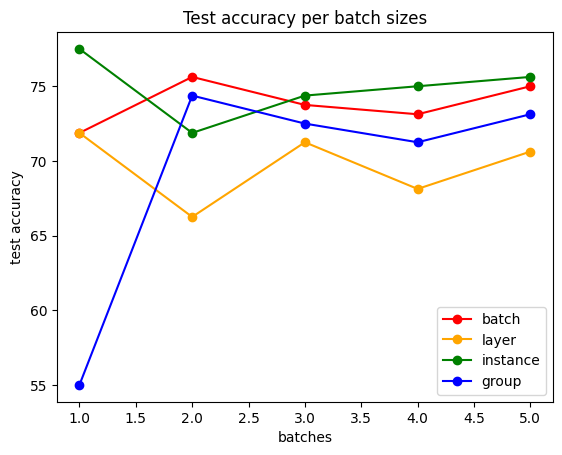

In [45]:
batch_size = [2, 4, 8, 16, 32]
batch_size = np.log2(batch_size)
plt.plot(batch_size, test_accuracy_normalization[0], color='red', marker='o', label='batch') 
plt.plot(batch_size, test_accuracy_normalization[1], color='orange', marker='o', label='layer') 
plt.plot(batch_size, test_accuracy_normalization[2], color='green', marker='o', label='instance') 
plt.plot(batch_size, test_accuracy_normalization[3], color='blue', marker='o', label='group')   
# plt.ylim([70, 75])
plt.xlabel('batches')      
plt.ylabel('test accuracy')    
plt.title('Test accuracy per batch sizes')          
plt.legend()                 
plt.show()

In [12]:
# 4-4
# 다른 regularization은 maxpool, residual connection 등을 말하는건가?
# 일단 dropout만 함

model_w_do= cnn.CustomCNN(skip_connection=1) # model with dropout, base model
model_wo_do = cnn.CustomCNN(skip_connection=1, dropout=False) # model without dropout
criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
optimizer_w_do = optim.Adam(model_w_do.parameters(), lr=0.0001)
optimizer_wo_do = optim.Adam(model_wo_do.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_w_do = model_w_do.to(device)
model_wo_do = model_wo_do.to(device)

train_losses_w_do = cnn.train_model(model_w_do, train_loader_4, optimizer_w_do, criterion=criterion, num_epochs=100)
test_accuracy_w_do = cnn.evaluate_model(model_w_do, test_loader_4)

train_losses_wo_do = cnn.train_model(model_wo_do, train_loader_4, optimizer_wo_do, criterion=criterion, num_epochs=100)
test_accuracy_wo_do = cnn.evaluate_model(model_wo_do, test_loader_4)

accuracy = [test_accuracy_w_do, test_accuracy_wo_do]
print(accuracy)

Epoch 1/100, Loss: 2.3182
Epoch 2/100, Loss: 2.0494
Epoch 3/100, Loss: 1.6912
Epoch 4/100, Loss: 1.3453
Epoch 5/100, Loss: 1.1167
Epoch 6/100, Loss: 0.7929
Epoch 7/100, Loss: 0.6211
Epoch 8/100, Loss: 0.4764
Epoch 9/100, Loss: 0.3819
Epoch 10/100, Loss: 0.2517
Epoch 11/100, Loss: 0.2986
Epoch 12/100, Loss: 0.1792
Epoch 13/100, Loss: 0.1722
Epoch 14/100, Loss: 0.1769
Epoch 15/100, Loss: 0.0874
Epoch 16/100, Loss: 0.0938
Epoch 17/100, Loss: 0.0862
Epoch 18/100, Loss: 0.1268
Epoch 19/100, Loss: 0.0809
Epoch 20/100, Loss: 0.0841
Epoch 21/100, Loss: 0.0301
Epoch 22/100, Loss: 0.0411
Epoch 23/100, Loss: 0.0379
Epoch 24/100, Loss: 0.0234
Epoch 25/100, Loss: 0.0215
Epoch 26/100, Loss: 0.0438
Epoch 27/100, Loss: 0.0503
Epoch 28/100, Loss: 0.0215
Epoch 29/100, Loss: 0.0199
Epoch 30/100, Loss: 0.0185
Epoch 31/100, Loss: 0.0115
Epoch 32/100, Loss: 0.0166
Epoch 33/100, Loss: 0.0140
Epoch 34/100, Loss: 0.0634
Epoch 35/100, Loss: 0.0146
Epoch 36/100, Loss: 0.0084
Epoch 37/100, Loss: 0.0144
Epoch 38/1

In [5]:
# 4-5 different loss

base_model = cnn.CustomCNN(skip_connection=1)

softmax = nn.CrossEntropyLoss() #softmax based loss
sqauredHinge = cnn.SquaredHingeLoss()  # squared hinge loss
optimizer = optim.Adam(base_model.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)

train_losses = cnn.train_model(base_model, train_loader_4, optimizer, criterion=softmax, num_epochs=100)
test_accuracy = cnn.evaluate_model(base_model, test_loader_4)

train_losses_sh = cnn.train_model(base_model, train_loader_4, optimizer, criterion=sqauredHinge, num_epochs=100)
test_accuracy_sh = cnn.evaluate_model(base_model, test_loader_4)

accuracy = [test_accuracy, test_accuracy_sh]
print(accuracy)


Epoch 1/100, Loss: 2.2926
Epoch 2/100, Loss: 2.0887
Epoch 3/100, Loss: 1.8514
Epoch 4/100, Loss: 1.5736
Epoch 5/100, Loss: 1.2034
Epoch 6/100, Loss: 0.9509
Epoch 7/100, Loss: 0.7800
Epoch 8/100, Loss: 0.6074
Epoch 9/100, Loss: 0.5632
Epoch 10/100, Loss: 0.3921
Epoch 11/100, Loss: 0.2845
Epoch 12/100, Loss: 0.2404
Epoch 13/100, Loss: 0.1777
Epoch 14/100, Loss: 0.1623
Epoch 15/100, Loss: 0.1074
Epoch 16/100, Loss: 0.1351
Epoch 17/100, Loss: 0.1498
Epoch 18/100, Loss: 0.1254
Epoch 19/100, Loss: 0.0723
Epoch 20/100, Loss: 0.0523
Epoch 21/100, Loss: 0.0772
Epoch 22/100, Loss: 0.0720
Epoch 23/100, Loss: 0.0448
Epoch 24/100, Loss: 0.0523
Epoch 25/100, Loss: 0.0595
Epoch 26/100, Loss: 0.0416
Epoch 27/100, Loss: 0.0424
Epoch 28/100, Loss: 0.0289
Epoch 29/100, Loss: 0.0694
Epoch 30/100, Loss: 0.0305
Epoch 31/100, Loss: 0.0258
Epoch 32/100, Loss: 0.0138
Epoch 33/100, Loss: 0.0258
Epoch 34/100, Loss: 0.0221
Epoch 35/100, Loss: 0.0217
Epoch 36/100, Loss: 0.0194
Epoch 37/100, Loss: 0.0455
Epoch 38/1

In [ ]:
# 4-6 truncated svd

model_svd = cnn.CustomCNN(compress_rank=128)

optimizer = optim.Adam(model_svd.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_svd = model_svd.to(device)

train_losses = cnn.train_model(model_svd, train_loader_4, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)

start = time.time()
test_accuracy = cnn.evaluate_model(model_svd, test_loader_4)
end = time.time()
test_time = end - start

model_svd.compress_fc_layers

start_svd = time.time()
test_accuracy = cnn.evaluate_model(model_svd, test_loader_4)
end_svd = time.time()
test_time_svd = end_svd - start_svd

print(test_time, test_time_svd)

Epoch 1/100, Loss: 2.4007
Epoch 2/100, Loss: 2.1356
Epoch 3/100, Loss: 1.9248
Epoch 4/100, Loss: 1.7557
Epoch 5/100, Loss: 1.4304
Epoch 6/100, Loss: 1.2132
Epoch 7/100, Loss: 0.9402
Epoch 8/100, Loss: 0.8286
Epoch 9/100, Loss: 0.6545
Epoch 10/100, Loss: 0.5868
Epoch 11/100, Loss: 0.4783
Epoch 12/100, Loss: 0.3300
Epoch 13/100, Loss: 0.3477
Epoch 14/100, Loss: 0.2748
Epoch 15/100, Loss: 0.1874
Epoch 16/100, Loss: 0.1939
Epoch 17/100, Loss: 0.1367
Epoch 18/100, Loss: 0.1377
Epoch 19/100, Loss: 0.1433
Epoch 20/100, Loss: 0.0631
Epoch 21/100, Loss: 0.0971
Epoch 22/100, Loss: 0.1063
Epoch 23/100, Loss: 0.0464
Epoch 24/100, Loss: 0.0473
Epoch 25/100, Loss: 0.0426
Epoch 26/100, Loss: 0.0299
Epoch 27/100, Loss: 0.0270
Epoch 28/100, Loss: 0.0456
Epoch 29/100, Loss: 0.0365
Epoch 30/100, Loss: 0.0392
Epoch 31/100, Loss: 0.0360
Epoch 32/100, Loss: 0.0377
Epoch 33/100, Loss: 0.0429
Epoch 34/100, Loss: 0.0373
Epoch 35/100, Loss: 0.0381
Epoch 36/100, Loss: 0.0450
Epoch 37/100, Loss: 0.0398
Epoch 38/1

In [31]:
# 4-7 여기까지만!!!!

base_model = cnn.CustomCNN(skip_connection=1)

softmax = nn.CrossEntropyLoss() #softmax based loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)

# learning_rate
learning_rate = [0.0001, 0.0002, 0.0005, 0.001]
train_loss_lr = []
test_accuracy_lr = []
for i in learning_rate:
    optimizer = optim.Adam(base_model.parameters(), lr=i)

    train_losses = cnn.train_model(base_model, train_loader_4, optimizer, criterion=softmax, num_epochs=100)
    test_accuracy = cnn.evaluate_model(base_model, test_loader_4)
    train_loss_lr.append(train_losses)
    test_accuracy_lr.append(test_accuracy)



Epoch 1/100, Loss: 2.3109
Epoch 2/100, Loss: 2.0585
Epoch 3/100, Loss: 1.7755
Epoch 4/100, Loss: 1.5299
Epoch 5/100, Loss: 1.2360
Epoch 6/100, Loss: 0.9241
Epoch 7/100, Loss: 0.8015
Epoch 8/100, Loss: 0.6578
Epoch 9/100, Loss: 0.5577
Epoch 10/100, Loss: 0.3897
Epoch 11/100, Loss: 0.2954
Epoch 12/100, Loss: 0.1714
Epoch 13/100, Loss: 0.1765
Epoch 14/100, Loss: 0.1671
Epoch 15/100, Loss: 0.1230
Epoch 16/100, Loss: 0.0828
Epoch 17/100, Loss: 0.1500
Epoch 18/100, Loss: 0.1016
Epoch 19/100, Loss: 0.0849
Epoch 20/100, Loss: 0.0789
Epoch 21/100, Loss: 0.0718
Epoch 22/100, Loss: 0.0717
Epoch 23/100, Loss: 0.0532
Epoch 24/100, Loss: 0.0292
Epoch 25/100, Loss: 0.0500
Epoch 26/100, Loss: 0.0391
Epoch 27/100, Loss: 0.0287
Epoch 28/100, Loss: 0.0131
Epoch 29/100, Loss: 0.0299
Epoch 30/100, Loss: 0.0147
Epoch 31/100, Loss: 0.0260
Epoch 32/100, Loss: 0.0226
Epoch 33/100, Loss: 0.0208
Epoch 34/100, Loss: 0.0232
Epoch 35/100, Loss: 0.0269
Epoch 36/100, Loss: 0.0183
Epoch 37/100, Loss: 0.0181
Epoch 38/1

In [17]:

# batch sizes
train_loaders = [train_loader_2, train_loader_4, train_loader_8, train_loader_16, train_loader_32]
test_loaders = [test_loader_2, test_loader_4, test_loader_8, test_loader_16, test_loader_32]
optimizer = optim.Adam(base_model.parameters(), lr=0.0001)
test_accuracy_batch = []
for i in range(5):
    train_losses = cnn.train_model(base_model, train_loaders[i], optimizer, criterion=softmax, num_epochs=100)
    test_accuracy = cnn.evaluate_model(base_model, test_loaders[i])
    test_accuracy_batch.append(test_accuracy)



Epoch 1/100, Loss: 0.0000
Epoch 2/100, Loss: 0.0000
Epoch 3/100, Loss: 0.0000
Epoch 4/100, Loss: 0.0000
Epoch 5/100, Loss: 0.0000
Epoch 6/100, Loss: 0.0000
Epoch 7/100, Loss: 0.0000
Epoch 8/100, Loss: 0.0000
Epoch 9/100, Loss: 0.0000
Epoch 10/100, Loss: 0.0000
Epoch 11/100, Loss: 0.0000
Epoch 12/100, Loss: 0.0000
Epoch 13/100, Loss: 0.0000
Epoch 14/100, Loss: 0.0000
Epoch 15/100, Loss: 0.0000
Epoch 16/100, Loss: 0.0000
Epoch 17/100, Loss: 0.0000
Epoch 18/100, Loss: 0.0000
Epoch 19/100, Loss: 0.0000
Epoch 20/100, Loss: 0.0000
Epoch 21/100, Loss: 0.0001
Epoch 22/100, Loss: 0.0000
Epoch 23/100, Loss: 0.0000
Epoch 24/100, Loss: 0.0000
Epoch 25/100, Loss: 0.0000
Epoch 26/100, Loss: 0.0000
Epoch 27/100, Loss: 0.0000
Epoch 28/100, Loss: 0.0000
Epoch 29/100, Loss: 0.0000
Epoch 30/100, Loss: 0.0084
Epoch 31/100, Loss: 0.0000
Epoch 32/100, Loss: 0.0000
Epoch 33/100, Loss: 0.0000
Epoch 34/100, Loss: 0.0000
Epoch 35/100, Loss: 0.0003
Epoch 36/100, Loss: 0.0000
Epoch 37/100, Loss: 0.0000
Epoch 38/1

In [ ]:
# number of epochs
epochs = [30, 50, 75, 100, 125, 150]
optimizer = optim.Adam(base_model.parameters(), lr=0.0001)
test_accuracy_epoch = []
for i in epochs:
    train_losses = cnn.train_model(base_model, train_loader_4, optimizer, criterion=softmax, num_epochs=i)
    test_accuracy = cnn.evaluate_model(base_model, test_loader_4)
    test_accuracy_epoch.append(test_accuracy)

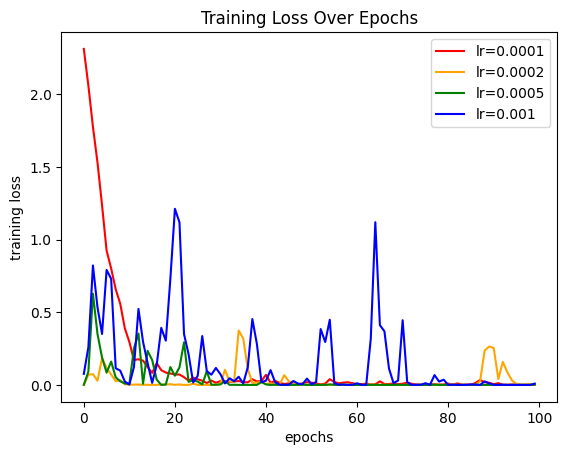

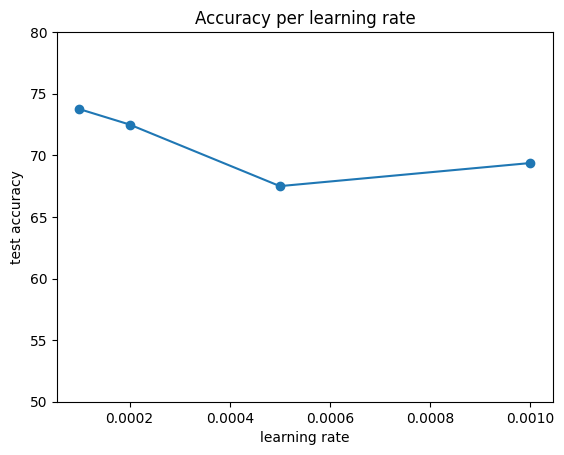

NameError: name 'test_accuracy_batch' is not defined

In [34]:
# learning_rate = [0.0001, 0.0005, 0.001, 0.005]

plt.plot(train_loss_lr[0], color='red',label='lr=0.0001')
plt.plot(train_loss_lr[1], color='orange',label='lr=0.0002')
plt.plot(train_loss_lr[2], color='green',label='lr=0.0005')
plt.plot(train_loss_lr[3], color='blue', label='lr=0.001')
plt.xlabel('epochs')      
plt.ylabel('training loss')    
plt.title('Training Loss Over Epochs')          
plt.legend()                 
plt.show()

plt.plot(learning_rate, test_accuracy_lr, marker='o', linestyle='-')   
plt.ylim([50, 80])
plt.xlabel("learning rate")
plt.ylabel("test accuracy")
plt.title("Accuracy per learning rate")
plt.show()

batch_size = [2, 4, 8, 16, 32]
plt.plot(batch_size, test_accuracy_batch, marker='o', linestyle='-')   
plt.ylim([70, 75])
plt.xlabel("batch size")
plt.ylabel("test accuracy")
plt.title("Accuracy per batch sizes")
plt.show()

plt.plot(epochs, test_accuracy_epoch, marker='o', linestyle='-')   
plt.ylim([50, 80])
plt.xlabel("number of epochs")
plt.ylabel("test accuracy")
plt.title("Accuracy per number of epochs")
plt.show()

In [9]:
print(learning_rate)
print(test_accuracy_lr)

print(batch_size)
print(test_accuracy_batch)

print(epochs)
print(test_accuracy_epoch)

[0.0001, 0.0005, 0.001, 0.005]
[72.5, 70.0, 70.0, 70.625]
[16, 32, 64, 128]
[71.875, 70.0, 69.375, 74.375]
[30, 50, 75, 100, 125, 150]
[74.375, 75.0, 75.625, 71.25, 75.625, 73.125]
